# Create Own Dataset in Memory

ref. https://towardsdatascience.com/a-beginners-guide-to-graph-neural-networks-using-pytorch-geometric-part-1-d98dc93e7742

## PyTorch Geometricセットアップ

**Runtime** GPU

In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.12.0+cu113
     |████████████████████████████████| 7.9 MB 3.6 MB/s 
     |████████████████████████████████| 3.5 MB 2.5 MB/s 


## 前準備 with NetworkX

In [2]:
import networkx as nx
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

# load graph from networkx library
G = nx.karate_club_graph()

# retrieve the labels for each node
labels = np.asarray([G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes]).astype(np.int64)
# create edge index from 
adj = nx.to_scipy_sparse_matrix(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

# using degree as embedding
embeddings = np.array(list(dict(G.degree()).values()))

# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))

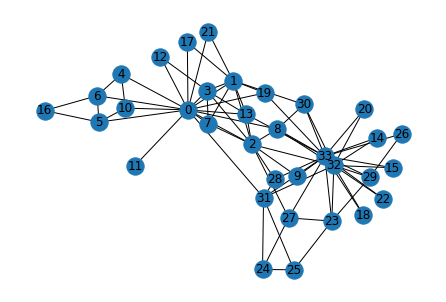

In [6]:
nx.draw(G, with_labels=True)

In [7]:
import random
[G.nodes[i]['club'] for i in random.sample(range(G.number_of_nodes()), 10)]

['Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Mr. Hi',
 'Mr. Hi']

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

隣接行列（密行列）

In [ ]:
print(nx.adjacency_matrix(G).todense())

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


隣接行列（疎行列）

たとえば*node0*と*node17*の間に辺が存在する。

In [ ]:
edge_index = torch.stack([row, col], dim=0)
print(edge_index)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

頂点次数からembeddingを作る。

In [ ]:
embeddings = np.array(list(dict(G.degree()).values()))
embeddings

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

In [ ]:
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))
embeddings

array([[ 2.98709092],
       [ 1.15480319],
       [ 1.41655858],
       [ 0.36953702],
       [-0.41572915],
       [-0.15397376],
       [-0.15397376],
       [-0.15397376],
       [ 0.10778163],
       [-0.67748454],
       [-0.41572915],
       [-0.93923993],
       [-0.67748454],
       [ 0.10778163],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.41572915],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [ 0.10778163],
       [-0.41572915],
       [-0.41572915],
       [-0.67748454],
       [-0.15397376],
       [-0.41572915],
       [-0.15397376],
       [-0.15397376],
       [ 0.36953702],
       [ 1.94006936],
       [ 3.24884631]])

標準化：平均⇨0、標準偏差=1.0

In [ ]:
embeddings.mean(), embeddings.std()

(1.3061447348531253e-17, 1.0)

## PyGの学習データ形式に変換 with ScikitLearn

In [9]:
import torch
import pandas as pd
from torch_geometric.data import InMemoryDataset, Data
from sklearn.model_selection import train_test_split
import torch_geometric.transforms as T

# custom dataset
class KarateDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(KarateDataset, self).__init__('.', transform, None, None)

        data = Data(edge_index=edge_index)
        
        data.num_nodes = G.number_of_nodes()
        
        # embedding 
        data.x = torch.from_numpy(embeddings).type(torch.float32)
        
        # labels
        y = torch.from_numpy(labels).type(torch.long)
        data.y = y.clone().detach() # オリジナルのコピーを作り、かつ計算グラフの対象から外す
        
        data.num_classes = 2

        # splitting the data into train, validation and test
        X_train, X_test, y_train, y_test = train_test_split(pd.Series(list(G.nodes())), 
                                                            pd.Series(labels),
                                                            test_size=0.30, 
                                                            random_state=42)
        
        n_nodes = G.number_of_nodes()
        
        # create train and test masks for data
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[X_train.index] = True
        test_mask[X_test.index] = True
        data['train_mask'] = train_mask
        data['test_mask'] = test_mask

        self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)
    
dataset = KarateDataset()
data = dataset[0]

In [10]:
data.num_features

1

## モデルの設定 Graph Convolutional Network

In [12]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device) 

## 訓練trainとテストtest

- KarateClubの各メンバーはあらかじめMr.HiグループとOfficerのグループに分かれている（ラベル付けされている）。
- この既に出来上がっている関係を、学習データ（エンコーディングされた頂点次数とラベル）によって学習し、学習済みモデルを予測器として、残ったテストデータに適用し、精度を評価する。

In [13]:
torch.manual_seed(42)

optimizer_name = "Adam"
lr = 1e-1
optimizer = getattr(torch.optim, optimizer_name)(model.parameters(), lr=lr)
epochs = 200

def train():
  model.train()
  optimizer.zero_grad()
  F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
  optimizer.step()

@torch.no_grad()
def test():
  model.eval()
  logits = model() # ロジット回帰
  mask1 = data['train_mask']
  pred1 = logits[mask1].max(1)[1]
  acc1 = pred1.eq(data.y[mask1]).sum().item() / mask1.sum().item()
  mask = data['test_mask']
  pred = logits[mask].max(1)[1]
  acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
  return acc1,acc

for epoch in range(1, epochs):
  train()

train_acc,test_acc = test()

print('#' * 70)
print('Train Accuracy: %s' %train_acc )
print('Test Accuracy: %s' % test_acc)
print('#' * 70)

######################################################################
Train Accuracy: 0.8695652173913043
Test Accuracy: 0.7272727272727273
######################################################################
